In [1]:
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Lambda, Softmax
from tensorflow.keras import Model
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
# Convert y_train into one-hot format
temp = []
for i in range(len(y_train)):
    temp.append(to_categorical(y_train[i], num_classes=10))
y_train = np.array(temp)
# Convert y_test into one-hot format
temp = []
for i in range(len(y_test)):    
    temp.append(to_categorical(y_test[i], num_classes=10))
y_test = np.array(temp)

In [4]:
#reshaping
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [5]:
inputs = Input(shape=(28,28,1))
out = Lambda(lambda x: x/1000)(inputs)
out = Conv2D(1,3)(out)
out = Lambda(lambda x: x**2+x)(out)
out = Flatten()(out)
out = Dense(10, activation=None)(out)
out = Softmax()(out)
model = Model(inputs, out)

In [6]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
lambda (Lambda)              (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 1)         10        
_________________________________________________________________
lambda_1 (Lambda)            (None, 26, 26, 1)         0         
_________________________________________________________________
flatten (Flatten)            (None, 676)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                6770      
_________________________________________________________________
softmax (Softmax)            (None, 10)                0     

In [7]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['acc']
    )

In [8]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 2s 977us/step - loss: 0.8025 - acc: 0.7974 - val_loss: 0.3139 - val_acc: 0.9094
Epoch 2/10
1875/1875 [==============================] - 2s 935us/step - loss: 0.3174 - acc: 0.9057 - val_loss: 0.2842 - val_acc: 0.9156
Epoch 3/10
1875/1875 [==============================] - 2s 950us/step - loss: 0.2982 - acc: 0.9117 - val_loss: 0.2834 - val_acc: 0.9201
Epoch 4/10
1875/1875 [==============================] - 2s 941us/step - loss: 0.2956 - acc: 0.9119 - val_loss: 0.2831 - val_acc: 0.9172
Epoch 5/10
1875/1875 [==============================] - 2s 956us/step - loss: 0.2800 - acc: 0.9165 - val_loss: 0.2655 - val_acc: 0.9233
Epoch 6/10
1875/1875 [==============================] - 2s 871us/step - loss: 0.2773 - acc: 0.9182 - val_loss: 0.2695 - val_acc: 0.9217
Epoch 7/10
1875/1875 [==============================] - 2s 859us/step - loss: 0.2782 - acc: 0.9174 - val_loss: 0.2653 - val_acc: 0.9219
Epoch 8/10
1875/1875 [==========================

In [9]:
X = X_test[0]
X.shape, X.min(), X.max()

((28, 28, 1), 0, 255)

In [10]:
model2 = Model(model.input, model.layers[-2].output)

In [11]:
model2.predict(X_test[[0]])

array([[ -0.47087878,  -6.194486  ,   3.474044  ,   8.786284  ,
         -0.59760684,   1.9168414 , -10.066298  ,  15.407355  ,
         -3.065394  ,   3.696538  ]], dtype=float32)

In [12]:
model.predict(X_test[[0]])

array([[1.26936129e-07, 4.14814960e-10, 6.55908707e-06, 1.33021001e-03,
        1.11827255e-07, 1.38216228e-06, 8.63670854e-12, 9.98653293e-01,
        9.47985068e-09, 8.19353590e-06]], dtype=float32)

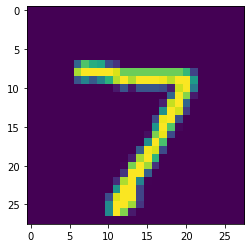

In [13]:
plt.imshow(X)

In [14]:
model.weights

[<tf.Variable 'conv2d/kernel:0' shape=(3, 3, 1, 1) dtype=float32, numpy=
 array([[[[ 0.52698594]],
 
         [[ 0.08442891]],
 
         [[ 0.01869087]]],
 
 
        [[[-1.3245686 ]],
 
         [[-1.3917689 ]],
 
         [[-1.8389475 ]]],
 
 
        [[[-0.27898604]],
 
         [[-0.448968  ]],
 
         [[-0.3638724 ]]]], dtype=float32)>,
 <tf.Variable 'conv2d/bias:0' shape=(1,) dtype=float32, numpy=array([0.3618775], dtype=float32)>,
 <tf.Variable 'dense/kernel:0' shape=(676, 10) dtype=float32, numpy=
 array([[-0.03674026, -0.18812837,  0.01979426, ...,  0.05463602,
          0.01662535, -0.00871159],
        [ 0.02171878, -0.18518244,  0.11909918, ..., -0.03949559,
          0.02754857,  0.0684126 ],
        [-0.01097946, -0.07011281,  0.12056817, ..., -0.05811585,
          0.09220186, -0.07498543],
        ...,
        [-0.0361205 , -0.14020608,  0.12612993, ..., -0.09845617,
         -0.01772444,  0.07013445],
        [-0.07452048, -0.2042869 ,  0.07853597, ...,  0.01920246

In [15]:
in_json = {
    "in": (X*(10**6)).astype(int).flatten().tolist(), # X is already 1000 times to begin with, scaling by 10**6 to match the overall 10**9 precision
    "conv2d_weights": (model.weights[0].numpy()*(10**9)).round().astype(int).flatten().tolist(),
    "conv2d_bias": (model.weights[1].numpy()*(10**9)*(10**9)).round().astype(int).flatten().tolist(),
    # poly layer would be (10**9)*(10**9)=10**18 times as well
    "dense_weights":(model.weights[2].numpy()*(10**9)).round().astype(int).flatten().tolist(),
    "dense_bias": np.zeros(model.weights[3].numpy().shape).tolist() # zero because we are not doing softmax in circom, just argmax
}

In [16]:
import json

In [17]:
with open("mnist_poly_input.json", "w") as f:
    json.dump(in_json, f)